In [315]:
#gettting data ready 
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease=  pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# x == feature matrix , all columns but the result one 
X = heart_disease.drop("target",axis=1)
# y = labels
Y = heart_disease["target"]


In [21]:
# choose the right model and hyperparameters(dials) , 
#it's a classification problem 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#keeping default perameters
clf.get_params()


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
#fit model into training data 

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [23]:
#fit into the training model 
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
Y_preds = clf.predict(X_test)
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
Y_test


179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [26]:
#evaliate the model 
clf.score(X_train,Y_train)
#will overfit since it's been teained on these exact data 

1.0

In [27]:
clf.score(X_test,Y_test)

0.8524590163934426

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [29]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [30]:
accuracy_score(Y_test,Y_preds)

0.8524590163934426

In [31]:
#importve the model
# try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):   #10 to 100 , with 10 interval
    print(f"Trying model with {i} estimators ..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_test,Y_test)
    print(f"Model Accurace on test set : {clf.score(X_test,Y_test) * 100:.2f} %")

Trying model with 10 estimators ..
Model Accurace on test set : 98.36 %
Trying model with 20 estimators ..
Model Accurace on test set : 100.00 %
Trying model with 30 estimators ..
Model Accurace on test set : 100.00 %
Trying model with 40 estimators ..
Model Accurace on test set : 100.00 %
Trying model with 50 estimators ..
Model Accurace on test set : 100.00 %
Trying model with 60 estimators ..
Model Accurace on test set : 100.00 %
Trying model with 70 estimators ..
Model Accurace on test set : 100.00 %
Trying model with 80 estimators ..
Model Accurace on test set : 100.00 %
Trying model with 90 estimators ..
Model Accurace on test set : 100.00 %


In [32]:
#save the model
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [33]:
#load
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_train,Y_train)

0.7975206611570248

# 1. Getting data ready    

1- Split data into features and labels    
2- Filling or disregarding missing values      
3- Converting non-numerical values to numerical (feature encoding)

### Data Split

In [34]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
X = heart_disease.drop("target", axis =1 )
Y= heart_disease["target"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)

In [38]:
X_train.shape ,X_test.shape , Y_train.shape , Y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Filling the missing data

In [39]:
car_sales= pd.read_csv("data/car-sales-extended.csv")

In [40]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [41]:
len(car_sales)

1000

In [42]:
X = car_sales.drop("Price",axis =1 )
Y = car_sales["Price"]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)
X_train.shape ,X_test.shape , Y_train.shape , Y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [43]:
#for number prediction
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test) #can't convert non-ints , for will give error 

c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Toyota'

In [44]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [45]:
#now we turn the non-ints into catagories/groups that the data goes into 

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [47]:
catagorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", #name
                                one_hot,  #transformer   
                                catagorical_features)], #columns
                                remainder ="passthrough" #what to do with rest
                               )
transformed_X= transformer.fit_transform(X)


In [48]:
#one hot transformed X
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [49]:
 pd.DataFrame (transformed_X).head()
    #this has transformed all non-numericals into catagories
    # if nissan is label 2 , for a nissan car, the 
    # 2 column is 1 only . Sort of like Identity Matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [50]:
#here's a clearer look of what's happening 
dummies = pd.get_dummies (car_sales [["Make","Colour","Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [51]:
np.random.seed(42)

X_train , X_test , Y_train , Y_test = train_test_split(transformed_X,Y, test_size = 0.2)
X_train.shape ,X_test.shape , Y_train.shape , Y_test.shape

model.fit(X_train,Y_train)
model.score(X_test,Y_test)
#not relevent data , so the prediction accuracy is poor 

0.30431565439836705

In [52]:
...

Ellipsis

### Filling missing values 
1. fill them 
2. drop the nan

### Handleing missing data with pandas

In [53]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [173]:
#filling with pandas

car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Colour"].fillna("missing", inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

car_sales_missing["Doors"].fillna(car_sales_missing["Doors"].mean(),inplace=True)



In [174]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [175]:
#some have price missing , drop all of them 

car_sales_missing.dropna(inplace=True)

car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [58]:
len(car_sales_missing)

950

In [176]:
X= car_sales_missing.drop("Price", axis=1)
Y= car_sales_missing["Price"]

In [177]:
#converting non neumerical 

catagorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", #custom name of tranformation
                                OneHotEncoder(),  #transformer method   
                                catagorical_features ) ] , #columns to work on 
                                remainder ="passthrough" #what to do with rest
                               )
transformed_X= transformer.fit_transform(X)


In [178]:
np.random.seed(42)

X_train , X_test , Y_train , Y_test = train_test_split(transformed_X,Y, test_size = 0.2)
X_train.shape ,X_test.shape , Y_train.shape , Y_test.shape

model.fit(X_train,Y_train)
model.score(X_test,Y_test)
#not relevent data , so the prediction accuracy is poor 

0.21984434202175795

### Handleing missing data with Scikit learn

In [62]:
#csm = car sales missing
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [63]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [64]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [65]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [66]:
# filling missing data with sklearn

from sklearn.impute import SimpleImputer
#to impose any kind to transformation to columns
from sklearn.compose import ColumnTransformer 

#make varibale containing simpleInputer function
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy = "mean")

#define column
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#create in imputer 
imputer = ColumnTransformer([
    ("cat_imp",cat_imputer,cat_features),
    ("door_imp",door_imputer,door_features),
    ("num_imp",num_imputer,num_features)
])


#transform data 

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [67]:
#make a new dataframe to check 
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make","Colour","Odometer (KM)","Doors"]
                               )
car_sales_filled.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [68]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [69]:
#fitting into a model 

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(transformed_X,Y,test_size=.2)

model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.21983643632182018

# 2. Choosing the Rigth estimator / algorithm for our problem

 types 
 
 1- classification - predict whether a sample is one thing or not                      
 2- regression - predict a number

### 2.1 Picking ML model for regression problem 

In [70]:
# import Boston hoousing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [71]:
#Fitting it into a dataframe
#the housing data keeps column names in a dictionary named "feature_names"
boston_df = pd.DataFrame(boston["data"], columns= boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 SK ML map 
    https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [72]:
#the chart from sklearn says to use ridge regression or SVR in this one

#using Ridge

from sklearn.linear_model import Ridge 

np.random.seed(42)

X= boston_df.drop("target", axis=1)
Y= boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

model = Ridge()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)



0.6662221670168521

In [73]:
# using SVR 

from sklearn import svm
regr = svm.SVR()
regr.fit(X_train,Y_train)
regr.score(X_test,Y_test)

c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.023259579281532883

 How to imorove the score ? 

 Trying out random forset 

In [74]:
 from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop("target", axis=1)
Y= boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

 rf= RandomForestRegressor(n_estimators=100)
 rf.fit(X_train,Y_train)
 rf.score(X_test,Y_test)


0.873969014117403

### 2.2 Choosing an estimator for classification model 

In [75]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

Linear SVC is recommended by the map

In [77]:
from sklearn.svm import LinearSVC

In [78]:
np.random.seed(42)
X= heart_disease.drop("target", axis=1)
Y= heart_disease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size= .2)

clf= LinearSVC()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7613168724279835

Now trying out with an Ensemble classifier(Random forest)

In [79]:

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X= heart_disease.drop("target", axis=1)
Y= heart_disease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size= .2)

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,Y_train)
rfc.score(X_test,Y_test)

0.831275720164609

NOTE :          
 1- For structured data , Ensemble methods work best         
 2- For unstructured data , use deep learning or transfer learning 

## 3 Fit the model to data and use it 

 ### 3.1 Fitting the model to data 

### 3.2 Making predictions using a ml model 

use          
    predict( )           
    predict_proba( )

In [80]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [81]:
Y_preds = rfc.predict(X_test) #predicted results
Y_preds

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1], dtype=int64)

In [82]:
np.array([Y_test]) #actual result 

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1]], dtype=int64)

In [83]:
rfc.score(X_test,Y_test)

0.831275720164609

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_preds)

0.831275720164609

Make predictions with predict_proba( )

In [85]:
#returns probabilprobability of classification lable 
rfc.predict_proba(X_test[:5]) 
# left one is prob of being 0
# right one is prob of being 1 

array([[0.854, 0.146],
       [0.402, 0.598],
       [0.366, 0.634],
       [0.914, 0.086],
       [0.206, 0.794]])

In [86]:
 rfc.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

using predict() for regression models

In [87]:
 from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop("target", axis=1)
Y= boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

 model = RandomForestRegressor(n_estimators=100).fit(X_train,Y_train)
 model.score(X_test,Y_test)


0.873969014117403

In [88]:
Y_pred = model.predict(X_test)

In [89]:
Y_pred[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [90]:
np.array(Y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [91]:
#compare the predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_pred)
#on average ,all predictions are +/- (value) off

2.1226372549019623

# 4. Evaluation of a ml model


  3 basic ways to evaluate ml models in scikit learn 

1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem-specific metirc function 

**Most important  documentation on the entire site**        
For more Evaluation models https://scikit-learn.org/stable/modules/model_evaluation.html



In [92]:

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X= heart_disease.drop("target", axis=1)
Y= heart_disease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size= .2)

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,Y_train)

#Returns the mean accuracy on the given test data and labels.
rfc.score(X_test,Y_test)

0.831275720164609

In [93]:
 from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop("target", axis=1)
Y= boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

 model = RandomForestRegressor(n_estimators=100).fit(X_train,Y_train)

 #Returns the coefficient of determination R^2 of the prediction.   
#shift+tab for details
model.score(X_test,Y_test)


0.873969014117403

### 4.2 Evaluation of model using the scoring parameter 

learning to use cross validation value

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
Y= heart_disease["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train);

In [95]:
clf.score(X_test,Y_test)

0.8524590163934426

In [96]:
cross_val_score(clf,X,Y, cv=5) 

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [97]:
#let's compare default scoring of a model and mean cross val. score 
np.random.seed(42)

clf_single_score= clf.score(X_test,Y_test)

clf_cross_val_score = np.mean(cross_val_score(clf,X,Y, cv=5,scoring=None))
# since scoring is set to none , estimator's deafult scoring method is called

clf_cross_val_score, clf_single_score

(0.8248087431693989, 0.8524590163934426)

### 4.2.1 Cassification model evaluation mertics

1. Accuracy
2. Area under ROC curve
3. Confusion matric
4. Classification report

**1.Accuracy**

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
Y= heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf,X,Y, cv=5)
np.mean(cross_val_score)

0.8248087431693989

In [99]:
print(f"Cross validated Accuracy: {np.mean(cross_val_score)*100 :.2f}%")

Cross validated Accuracy: 82.48%


**2. Area under ROC curve (receiver operative characteristics )**

ROC curves are comparison of true positive rate and false positive rate ( tpr vs fpr )

In [100]:
from sklearn.metrics import roc_curve
#make predictions with probability

np.random.seed(42)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

clf.fit(X_train,Y_train)

Y_probs = clf.predict_proba(X_test)
Y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [101]:
#gives wrong answer 
Y_probs_positive = Y_probs[:, 1] 
# 1 is the index of column we want, the prb of being 1 
Y_probs_positive[:10]  

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [102]:
#calculate fpr,tpr, threshold
fpr,tpr,threshold = roc_curve(Y_test,Y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

Create a function for plotting ROC curve              
(Receiver Operating Characteristic Curve) 

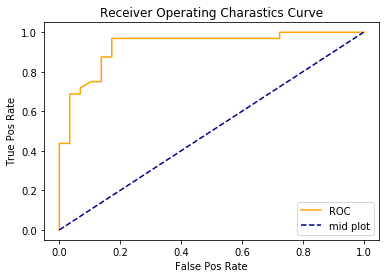

In [103]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr) :
    '''
    Plots ROC curve plots false pos rate and true pos rate of a model
    '''
    #plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #mid point line
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--", label="mid plot")
    
    #plot customizing
    plt.xlabel("False Pos Rate")
    plt.ylabel("True Pos Rate")
    plt.title("Receiver Operating Charastics Curve")
    plt.legend() #adds commentry box 
    plt.show()
    
plot_roc_curve(fpr,tpr)    
    
    
    
    

In [104]:
from sklearn.metrics import roc_auc_score  #auc = area under curve 

roc_auc_score(Y_test,Y_probs_positive)

0.9304956896551724

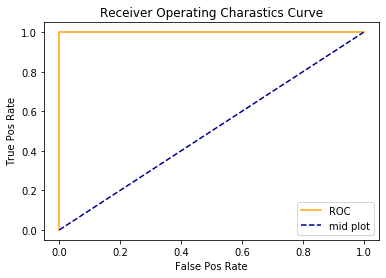

In [105]:
#plot perfect ROC for comparisn 

fpr,tpr, thresholds= roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

**3. Confusion Matrics**

A quick way to compare the labels a model predicts and the actual label is was supposed to predict . It basically points out where the model is getting confused 

In [106]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test) 
confusion_matrix(Y_test,Y_preds)


array([[24,  5],
       [ 4, 28]], dtype=int64)

In [107]:
#pd.crosstab for visualization of confusion matrics 
pd.crosstab(Y_test,
           Y_preds,
            rownames=["Actual Lables"],
           colnames=["Predicted Labels"])
# here [0,1] == false positive 
#      [1,0] == false negative 

Predicted Labels,0,1
Actual Lables,,
0,24,5
1,4,28


In [108]:
# visualize with seaborn heatmap

In [109]:
!conda install --yes seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Arian\miniconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |           py37_0         157 KB
    ------------------------------------------------------------
                                           Total:         157 KB

The following packages will be UPDATED:

  certifi                                 2020.4.5.1-py37_0 --> 2020.4.5.2-py37_0




certifi-2020.4.5.2   | 157 KB    |            |   0% 
certifi-2020.4.5.2   | 157 KB    | ##         |  20% 
certifi-2020.4.5.2   | 157 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


import seaborn as sns

sns.set(font_scale= 1.5)

con_mat = confusion_matrix(Y_test,Y_preds)

sns.heatmap(con_mat)

**Classification Report**


In [110]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**Precision** - Proportion positive flags by the model that were correct (TPR) , FPR lowers it           

**Recall** -  Proportion of actual Results(from the test part given by us) that were predicted by the model . Means, if the data has 100 o's , how many of those 0's were identified by the model . 

**F1-Score** - Combination of precision and recall

**Support** - How many of the examples the answer came from . Here, there were 29 cases to test the model on finding 0 , and 32 cases to find 1 .
If it had found 29 0's , the recall would've been 1.0 , meaning all 0's were identified 

**Macro Average** - Average of precision , recall , f1  scor . But it doesn't take class imbalance*(all class have equal number or supoort data) into account . 

**Weighted Average** - Same as before but will give high value if one class out performs another due to having more samples




In [111]:
#for comparisn
pd.DataFrame(classification_report(Y_test,Y_preds,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000


In [112]:
#Lets say , there are 10000 people and 1 has heart disease , identify which one

dis_true= np.zeros(10000)
dis_true[0]=1

disease_preds = np.zeros(10000) #model that predicts every case as 0

pd.DataFrame(classification_report(dis_true,
                                   disease_preds,
                                  output_dict=True))

c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**Macro Average in precision** - Notice how macro average is giving away the truth that , there are 2 actial classes and the accuracy is 50% , meaning there is a class that the model is not identifying .

**Recall** - Recall is 1 for 0 since all 0's were identified , since the model only identifies 0's .


**Summary of when to use which matrics**

 - Accuracy - If all classes are balanced           
 - Precision and Recall are important when classes are imbalanced        
 - if false positives are worse than false negatives , aim for high precision    
 - if flase negatives are worse than false positives , aim for high recall 


### 4.2.2 Regression Model Evaluation Matrics

https://scikit-learn.org/stable/modules/model_evaluation.html

Evaluation Matrics we're going to use 
* R^2 , also known as coefficient of determination
* Mean Absolute Error(MAE)
* Mean Squared Error (MSE)

**R^2**

Compares model prediction to the mean of the targets . 
* r^2 =0 if all the model does is predict mean of the targets . 
* 1 when model perfectly predicts a range of numbers 

Can range from neg to pos infinity 

In [113]:
from  sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop("target",axis=1)
Y= boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

rfr =RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,Y_train)
rfr.score(X_test,Y_test)

0.873969014117403

In [114]:
from sklearn.metrics import r2_score

#fill array with mean of y_test
Y_test_mean= np.full(len(Y_test),Y_test.mean())

In [115]:
Y_test.mean()

21.488235294117644

In [116]:
r2_score(Y_test,Y_test_mean)

0.0

In [117]:
r2_score(Y_test,Y_test)

1.0

**Mean absolute error (MAE)**

Average of absolute differences between predictions and actual values . Gives an average idea of how wrong the model is 

In [118]:
from sklearn.metrics import mean_absolute_error

Y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test,Y_preds)
mae

2.1226372549019623

In [119]:
df = pd.DataFrame(data={
    "Actual Values" : Y_test,
    "Predicted Values" : Y_preds,})
df["Differences"] = df["Predicted Values"] - df["Actual Values"]
df.head()

,Actual Values,Predicted Values,Differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753


**Mean Squared Error(MSE)**

In [120]:
from sklearn.metrics import mean_squared_error

Y_preds = model.predict(X_test)
mae = mean_squared_error(Y_test,Y_preds)
mae

9.242328990196082

In [121]:
#Calculate mse manually
squared = np.square(df["Differences"])
squared.mean()

9.242328990196082

**Which one to use ?**

* R^2 is like accuracy 
* MAE shows how off , on average our predictions are 
* MSE is needed when error rate is much more critical and needs more weight
(When bigger errors are much bigger problem)

### 4.23 Finally using the ' scoring ' parameter 

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target", axis=1)
Y= heart_disease["target"]

clf= RandomForestClassifier(n_estimators=100)
cv_acc= cross_val_score(clf,X,Y, cv = 5, scoring=None )
# scoring is dependent on the one model(clf) uses now, which is accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [125]:
print(f"Cross-val accuracy : {np.mean(cv_acc)*100: .2f} %")

Cross-val accuracy :  82.48 %


In [128]:
cv_acc= cross_val_score(clf,X,Y, cv = 5, scoring= "accuracy"  )
print(f"Cross-val accuracy : {np.mean(cv_acc)*100: .2f} %")

Cross-val accuracy :  82.49 %


In [129]:
cv_acc= cross_val_score(clf,X,Y, cv = 5, scoring= "precision"  )
print(f"Cross-val precision : {np.mean(cv_acc)*100: .2f} %")

Cross-val precision :  82.23 %


In [130]:
cv_acc= cross_val_score(clf,X,Y, cv = 5, scoring= "recall"  )
print(f"Cross-val recall : {np.mean(cv_acc)*100: .2f} %")

Cross-val recall :  83.64 %


In [131]:
cv_acc= cross_val_score(clf,X,Y, cv = 5, scoring= "f1"  )
print(f"Cross-val f1 : {np.mean(cv_acc)*100: .2f} %")

Cross-val f1 :  84.11 %


**Now regression models**

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X= boston_df.drop("target",axis=1)
Y= boston_df["target"]

model=RandomForestRegressor(n_estimators=100)

In [145]:
np.random.seed(42)
cv_r2= cross_val_score(model,X,Y, cv = 5, scoring= None )
print(f"Cross-val default(r2) : {np.mean(cv_r2)*100: .2f} %")

Cross-val default(r2) :  62.24 %


In [154]:
np.random.seed(42)
cv_mae= cross_val_score(model,X,Y, cv = 5, scoring= "neg_mean_absolute_error" )
print(f"Cross-val mae : {np.mean(cv_mae)}")

Cross-val mae : -3.0314302853814783


In [156]:
np.random.seed(42)
cv_mse= cross_val_score(model,X,Y, cv = 5, scoring= "neg_mean_squared_error" )
print(f"Cross-val mse : {np.mean(cv_mse)}")

Cross-val mse : -21.283214366686064


### 4.3 Using different evaluation matics as Scikit-learn functions 

**Classification Evaluation Functions**

In [164]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
Y=heart_disease["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

#make some predictions 
Y_preds= clf.predict(X_test)

#Evaluate the classifier 

print("Classifier metrics on the test set ")
print(f"Accuracy  :{accuracy_score(Y_test,Y_preds)*100:.2f}%")
print(f"Precision :{precision_score(Y_test,Y_preds)*100:.2f}%")
print(f"Recall    :{recall_score(Y_test,Y_preds)*100:.2f}%")
print(f"F1        :{f1_score(Y_test,Y_preds)*100:.2f}%")


Classifier metrics on the test set 
Accuracy  :85.25%
Precision :84.85%
Recall    :87.50%
F1        :86.15%


**Regression Evaluation Functions**

In [168]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)


X= boston_df.drop("target",axis=1)
Y= boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

Y_preds= model.predict(X_test)

print("Regression metrics on the test set ")

print(f"R^2 :{r2_score(Y_test,Y_preds)}")
print(f"MAE :{mean_absolute_error(Y_test,Y_preds)}%")
print(f"MSE :{mean_squared_error(Y_test,Y_preds)}%")

Regression metrics on the test set 
R^2 :0.8739690141174031
MAE :2.1226372549019623%
MSE :9.242328990196082%


## 5. Improving a model 

First prediction = baseline prediction 
First model = baseline model 

From data prospective 
* Could  we collect more data ? 
* Could we improve our data? (like how we used doors as classes instead of int, making the best out of the data through understanding of it )

From a model prospective 
* Is there a  better model we could use ? 
* Could we imporve the current model ? 

* Parameter = patterns found in the data by the model 
* Hyperparameter = settings on a model we can adjust to potentially imporve it's ability to find patterns 

Three ways to adjust hyperparameters :
1. By hand
2. Randimly by RandomSearchCV
3. Exhaustively by GridSearchCV



### 5.1 Tuning hyperparameters  by hand 

In [170]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to adjust 
- max_depth 
- max_features 
- min_samples_split
- min_samplts_split
- n_estimaters

In [231]:
#need to create train,val,test splits

def evaluate_preds(Y_true,Y_preds):
    ''' Performs evaluation comparison on a classification model'''
    accuracy = accuracy_score(Y_true,Y_preds)
    precision = precision_score(Y_true,Y_preds)
    recall = recall_score(Y_true,Y_preds)
    f1= f1_score(Y_true,Y_preds)
    metric_dict= {
        "accuracy": round(accuracy,2),
        "precision": round (precision,2),
        "recall":round(recall,2),
        "f1" : round(f1,2)
    }
    print(f"Accuracy : {accuracy*100:.2f}%")
    print(f"Precision : {precision :.2f}")
    print(f"Recall : {recall :.2f}")
    print(f"F1 : {f1 :.2f}")
    
    return metric_dict

In [232]:
# we need to manually split now 

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [233]:
#while slicing , we need to shuffle them up 

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

X=heart_disease_shuffled.drop("target", axis=1)
Y= heart_disease_shuffled["target"]

#creating index 
train_split= round(.7*len(heart_disease_shuffled)) # 70%
valid_split = round(train_split + .15*len(heart_disease_shuffled)) # 15%

X_train,Y_train = X[:train_split] , Y[:train_split] #0 to train_split
X_val,Y_val = X[train_split:valid_split] , Y[train_split:valid_split]
X_test,Y_test = X[valid_split:] , Y[valid_split:]


len(X_train) , len(X_val), len(X_test)

(212, 45, 46)

In [234]:
#make baseline prediction

clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

Y_preds = clf.predict(X_val)

# **important** 

#Evaluate the classifier on the validation set
baseline_metrics= evaluate_preds (Y_val,Y_preds) 


Accuracy : 80.00%
Precision : 0.77
Recall : 0.92
F1 : 0.84


c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [235]:
# n_estimator = 100
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,Y_train)

Y_preds_2 = clf_2.predict(X_val)

clf_2_metrics= evaluate_preds (Y_val,Y_preds_2) 


Accuracy : 82.22%
Precision : 0.84
Recall : 0.84
F1 : 0.84


In [240]:
# max_depth
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=100, max_depth= 5)
clf_3.fit(X_train,Y_train)

Y_preds_3 = clf_3.predict(X_val)

clf_3_metrics= evaluate_preds (Y_val,Y_preds_3) 


Accuracy : 82.22%
Precision : 0.81
Recall : 0.88
F1 : 0.85


 ### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [247]:
from sklearn.model_selection import RandomizedSearchCV

grid= {
    "n_estimators" : [10,100,200,300,500,1000,1200],
    "max_depth" : [None,5,10,20,30] , 
    "max_features" : ["auto","sqrt"],
    "min_samples_split" : [2,4,6],
    "min_samples_leaf" : [1,2,4]
}

np.random.seed(42)

X=heart_disease_shuffled.drop("target",axis=1)
Y= heart_disease_shuffled["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

clf = RandomForestClassifier(n_jobs= 1) #-1 if full cpu is to be dedicated

#Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10 , # number of models to try
                           cv=5,
                           verbose=2)
# fit the RSCV version in clf

rs_clf.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samp

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=500, min_samples_split=4, min_samples_lea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   26.3s finished
c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

In [248]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [252]:
# Make predictions on the best parameters 
rs_Y_preds = rs_clf.predict(X_test)

# Evaluate the predictions 
rs_metrics = evaluate_preds(Y_test,rs_y_preds)

Accuracy : 83.61%
Precision : 0.78
Recall : 0.89
F1 : 0.83


### 5.3 Hyper paramter tuning with GridSearchCV

In [255]:
grid

{'n_estimators': [10, 100, 200, 300, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [256]:
# selecting from the best ones of 'grid'
grid_2 = {
    "n_estimators" : [200,300,500],
    "max_depth" : [None,5] , 
    "max_features" : ["auto","sqrt"],
    "min_sa mples_split" : [4,6],
    "min_samples_leaf" : [2,4]
}


In [259]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

X= heart_disease_shuffled.drop("target",axis=1)
Y= heart_disease_shuffled["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)

clf = RandomForestClassifier(n_jobs=1)

# setup Grid Search CV
gs_clf = GridSearchCV(
                estimator= clf,
                param_grid = grid_2,
                scoring=None,
                refit=True,
                cv= 5,
                verbose= 2,
    )


gs_clf.fit(X_train,Y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   59.7s finished
c:\users\arian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [265]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 300}

In [307]:
np.random.seed(42)
gs_Y_preds = gs_clf.predict(X_test)

#evaluate predoctions 

gs_metrics = evaluate_preds(Y_test,gs_Y_preds)

Accuracy : 93.44%
Precision : 0.91
Recall : 0.97
F1 : 0.94


**Camparing different models matrics**

In [310]:
np.random.seed(42)
compare_matrics = pd.DataFrame({
    "baseline" : baseline_matrics,
    "clf_2"  : clf_2_metrics,
    "Random Search " : rs_metrics,
    "Grid search" : gs_metrics
})
compare_matrics

,baseline,clf_2,Random Search,Grid search
accuracy,0.80,0.82,0.84,0.93
precision,0.81,0.84,0.78,0.91
recall,0.84,0.84,0.89,0.97
f1,0.82,0.84,0.83,0.94


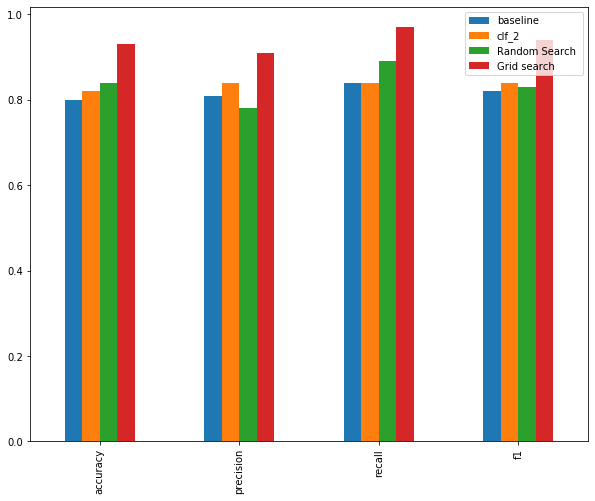

In [311]:
compare_matrics.plot.bar(figsize=(10,8))

## 6. Saving and loading a trained model

Note : Pickle is native system for saving and loading a model but 
       in cases of big numpy arrays and for fitted scikit-learn estimator,          use Joblib 

**6.1 using pickle**

In [334]:
import pickle

pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [335]:
loaded_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))


In [336]:
#make predictions 
np.random.seed(41)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

pkl_Y_preds = loaded_model.predict(X_test)

evaluate_preds(Y_test,pkl_Y_preds)

Accuracy : 93.44%
Precision : 0.91
Recall : 0.97
F1 : 0.94


{'accuracy': 0.93, 'precision': 0.91, 'recall': 0.97, 'f1': 0.94}

**6.2 Using Joblib**

In [337]:
from joblib import dump, load
#saving the model 
dump(gs_clf,filename= "gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [338]:
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [339]:
np.random.seed(42)
joblib_Y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(Y_test,joblib_Y_preds)

Accuracy : 93.44%
Precision : 0.91
Recall : 0.97
F1 : 0.94


{'accuracy': 0.93, 'precision': 0.91, 'recall': 0.97, 'f1': 0.94}

## 7. Putting it all together 

Tidy things up , ignoring the experiments , connecting the desired parts with Pipeline 

 Steps to follow 
 1. Fill missing data 
 2. Convert missing data to numbers 
 3. Build a ml model on the data 

In [362]:

# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [368]:
# use GridSearchCV with regression pipeline 
from sklearn.model_selection import GridSearchCV
# the double underscore is fro climbing up the pipeline 
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean","median"],
    "model__n_estimators":[100,500],
    "model__max_depth":[None,5],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimat

[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean, total=   1.1s
[CV] model__max_depth=None, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean, total=   1.1s
[CV] model__max_depth=None, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean, total=   1.1s
[CV] model__max_depth=None, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=median, total=   1.1s
[CV] model__max_depth=None, model__min_samples_split=4, model__n_est

[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, p

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   50.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [369]:
gs_model.score(X_test,Y_test)

0.3353388876417407

In [370]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__min_samples_split': 2,
 'model__n_estimators': 500,
 'preprocessor__num__imputer__strategy': 'median'}